In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# import io
# from google.colab import files
# uploaded = files.upload()
df=pd.read_excel(io.BytesIO(uploaded['Titanic Passengers.xlsx']))
df1=df
df.head()

,Name,Survived,Passenger Class,Sex,Age,Siblings and Spouses,Parents and Children,Fare,Port,Home / Destination,Validation
0,"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,211.3375,S,"St Louis, MO",1
1,"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON",1
2,"Allison, Miss. Helen Loraine",0,1,female,2.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON",0
3,"Allison, Mr. Hudson Joshua Creighton",0,1,male,30.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON",0
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,1,female,25.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON",0


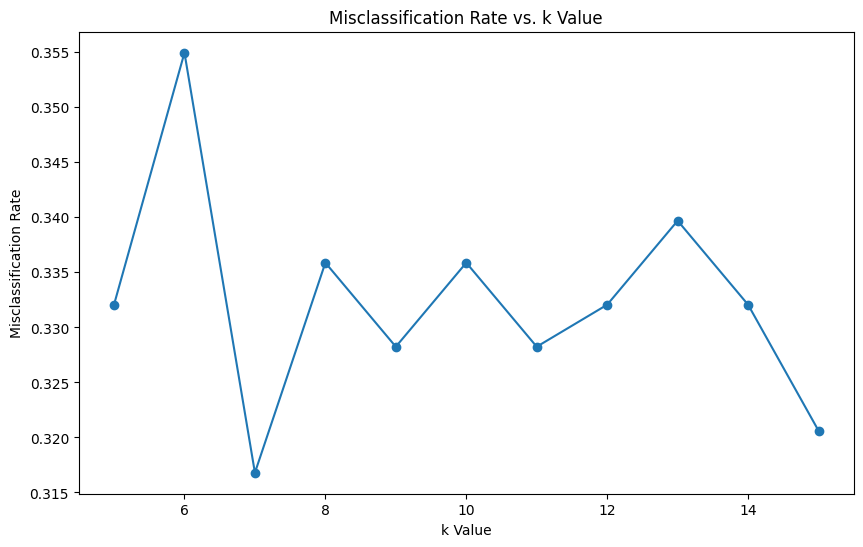

Optimal k value: 7
Misclassification rate: 0.316793893129771


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Preprocess the data
# Encode categorical variables
label_encoders = {}
for column in ['Sex', 'Port', 'Home / Destination']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Convert any remaining non-numeric columns to numeric
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = LabelEncoder().fit_transform(df[column])

# Handle missing values by imputing with the mean
df.fillna(df.mean(), inplace=True)


# Split the data into features and target variable
X = df.drop(columns=['Survived', 'Name', 'Validation'])
y = df['Survived']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate k values from 5 to 15
k_values = range(5, 16)
misclassification_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    misclassification_rate = 1 - accuracy_score(y_test, y_pred)
    misclassification_rates.append(misclassification_rate)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, misclassification_rates, marker='o')
plt.xlabel('k Value')
plt.ylabel('Misclassification Rate')
plt.title('Misclassification Rate vs. k Value')
plt.show()

# Find the optimal k value
optimal_k = k_values[np.argmin(misclassification_rates)]
optimal_misclassification_rate = min(misclassification_rates)

print(f'Optimal k value: {optimal_k}')
print(f'Misclassification rate: {optimal_misclassification_rate}')


In [27]:
# Validate the model with the optimal k value
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Print validation results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[123  21]
 [ 62  56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.85      0.75       144
           1       0.73      0.47      0.57       118

    accuracy                           0.68       262
   macro avg       0.70      0.66      0.66       262
weighted avg       0.69      0.68      0.67       262



In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the data
data=pd.read_excel(io.BytesIO(uploaded['Titanic Passengers (3).xlsx']))
print(data.head())

# Fill the missing value in the 'Fare' column with the median fare
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# Encode categorical variables
le_sex = LabelEncoder()
le_port = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data['Sex'])
data['Port'] = le_port.fit_transform(data['Port'])

# Fill any remaining missing values in feature columns with the median value
data['Age'] = data['Age'].fillna(data['Age'].median())

# Assign Baxter, Mr. Quigg Edmond to validation data
data.loc[data['Name'] == 'Baxter, Mr. Quigg Edmond', 'Validation'] = 1

# Define features and target variable
features = ['Passenger Class', 'Sex', 'Age', 'Siblings and Spouses', 'Parents and Children', 'Fare', 'Port']
X = data[features]
y = data['Survived']

# Split the data into training and validation sets
X_train = X[data['Validation'] == 0]
y_train = y[data['Validation'] == 0]
X_val = X[data['Validation'] == 1]
y_val = y[data['Validation'] == 1]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred = knn.predict(X_val_scaled)

# Add predictions to the validation set
validation_set = data[data['Validation'] == 1].copy()
validation_set['Predicted Survived'] = y_val_pred

# Save the validation set with predictions to an Excel file
from google.colab import drive
drive.mount('/content/drive')
# train_results.to_csv('/content/drive/MyDrive/train_predictions.csv', index=False)

# output_path = 'Validation_Set_Predictions.xlsx'
validation_set.to_excel('/content/drive/MyDrive/Validation_Set_Predictions.xlsx', index=False)

# Check the prediction for Baxter, Mr. Quigg Edmond
baxter_prediction = validation_set[validation_set['Name'] == 'Baxter, Mr. Quigg Edmond']['Predicted Survived'].values
print("baxter_prediction",baxter_prediction)


                                              Name  Survived  Passenger Class  \
0                    Allen, Miss. Elisabeth Walton         1                1   
1                   Allison, Master. Hudson Trevor         1                1   
2                     Allison, Miss. Helen Loraine         0                1   
3             Allison, Mr. Hudson Joshua Creighton         0                1   
4  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)         0                1   

      Sex      Age  Siblings and Spouses  Parents and Children      Fare Port  \
0  female  29.0000                     0                     0  211.3375    S   
1    male   0.9167                     1                     2  151.5500    S   
2  female   2.0000                     1                     2  151.5500    S   
3    male  30.0000                     1                     2  151.5500    S   
4  female  25.0000                     1                     2  151.5500    S   

                Home / Des

                                              Name  Survived  Passenger Class  \
0                    Allen, Miss. Elisabeth Walton         1                1   
1                   Allison, Master. Hudson Trevor         1                1   
2                     Allison, Miss. Helen Loraine         0                1   
3             Allison, Mr. Hudson Joshua Creighton         0                1   
4  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)         0                1   

      Sex      Age  Siblings and Spouses  Parents and Children      Fare Port  \
0  female  29.0000                     0                     0  211.3375    S   
1    male   0.9167                     1                     2  151.5500    S   
2  female   2.0000                     1                     2  151.5500    S   
3    male  30.0000                     1                     2  151.5500    S   
4  female  25.0000                     1                     2  151.5500    S   

                Home / Des

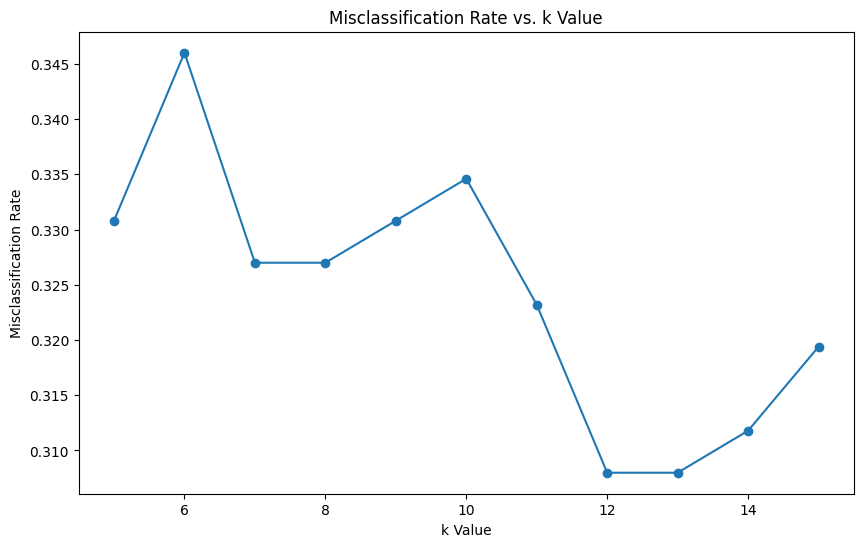

Optimal k value: 12
Misclassification rate: 0.3079847908745247


In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the data
data=pd.read_excel(io.BytesIO(uploaded['Titanic Passengers (3).xlsx']))
#evaluate passengers from Port “S”.
data = data[data['Port'] == 'S']

print(data.head())

# Preprocess the data
# Encode categorical variables
label_encoders = {}
for column in ['Sex', 'Port', 'Home / Destination']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Convert any remaining non-numeric columns to numeric
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = LabelEncoder().fit_transform(df[column])

# Handle missing values by imputing with the mean
df.fillna(df.mean(), inplace=True)


# Split the data into features and target variable
X = df.drop(columns=['Survived', 'Name', 'Validation'])
y = df['Survived']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate k values from 5 to 15
k_values = range(5, 16)
misclassification_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    misclassification_rate = 1 - accuracy_score(y_test, y_pred)
    misclassification_rates.append(misclassification_rate)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, misclassification_rates, marker='o')
plt.xlabel('k Value')
plt.ylabel('Misclassification Rate')
plt.title('Misclassification Rate vs. k Value')
plt.show()

# Find the optimal k value
optimal_k = k_values[np.argmin(misclassification_rates)]
optimal_misclassification_rate = min(misclassification_rates)

print(f'Optimal k value: {optimal_k}')
print(f'Misclassification rate: {optimal_misclassification_rate}')
